In [3]:
from google.colab import drive
import os
import shutil

In [4]:
from fastai.vision.all import *

In [5]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:100"

In [8]:
# Train the model!

# from fastai.vision.all import *
# path = untar_data(URLs.PETS)
# dls = ImageDataLoaders.from_name_re(path, 
#                                     get_image_files(path/'images'), 
#                                     pat='(.+)_\d+.jpg', 
#                                     item_tfms=Resize(460), 
#                                     batch_tfms=aug_transforms(size=224, min_scale=0.75))

from fastai.vision.all import *

# Define the path to the folder containing the images
path = Path("/content/gdrive/MyDrive/Colab Notebooks/Fast.ai/DL1/Lect2/Moonboard/processed_1000")
#path = Path()

# Define a function to extract the label from the filename
#def label_func(fname):
#    return str(fname).split("__")[-1].split(".")[0]
def label_func(fname):
    grade = str(fname).split("__")[-1].split(".")[0]
    return grade

# Get a list of all image files in the folder
files = get_image_files(path)

# Create a DataLoaders object
dls = ImageDataLoaders.from_name_func(path, files, valid_pct=0.2, seed=42, 
                                      bs=2, label_func=label_func)

learn = vision_learner(dls, models.resnet152, metrics=accuracy)
learn.fine_tune(1)
learn.path = Path('.')
learn.export()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth


URLError: ignored

In [ ]:
learn.final_record
learn.final_record[0]
learn.final_record[1]
learn.final_record[2]
type(learn.final_record)

fastcore.foundation.L

In [ ]:
### For Loop to Iterate the Model Parameters to see what seems best
## Goal Output: Three adjacent grids - each representing the three picture resolutions (x100, x300, x1000). 
#    Rows = Number of epochs (1, 3, 10, 30). 
#    Cols = Pretrained models (resent18, 34, 50, 101, 152)
#    Values = Max accuracy
# Let's also keep all of the training data

# Import fast.ai package
from fastai.vision.all import *

# Define the paths to sets of pictures to try
'''
pic_folder_paths = ["/content/gdrive/MyDrive/Colab Notebooks/Fast.ai/DL1/Lect2/Moonboard/processed_100", 
                    "/content/gdrive/MyDrive/Colab Notebooks/Fast.ai/DL1/Lect2/Moonboard/processed_300", 
                    "/content/gdrive/MyDrive/Colab Notebooks/Fast.ai/DL1/Lect2/Moonboard/processed_1000"]
'''
pic_folder_paths = ["/content/gdrive/MyDrive/Colab Notebooks/Fast.ai/DL1/Lect2/Moonboard/processed_1000",
                    "/content/gdrive/MyDrive/Colab Notebooks/Fast.ai/DL1/Lect2/Moonboard/processed_300"]

# Define the models to try
#models_list = [models.resnet18, models.resnet34, models.resnet50, models.resnet101, models.resnet152]
models_list = [models.resnet34, models.resnet50, 
               models.resnet101, models.resnet152]

# Define the number of epochs to try
num_epochs = [1, 3, 10, 30, 100]

# Create a variable to hold the output information
logger = [[[[0, 0, 0] for i in range(len(num_epochs))] 
           for j in range(len(models_list))] 
           for k in range(len(pic_folder_paths))]

# Define a function to extract the label from the filename
def label_func(fname):
    grade = str(fname).split("__")[-1].split(".")[0]
    return grade



# Define counters for the three loops
p_c = -1

# Iterate over all pictures
for p in pic_folder_paths:
  
  # Add to the p counter
  p_c += 1

  # Define the path to the folder containing the images
  path = Path(p)

  # Get a list of all image files in the folder
  files = get_image_files(path)

  # Create a DataLoaders object
  dls = ImageDataLoaders.from_name_func(path, files, valid_pct=0.2, seed=42, 
                                   bs=2, label_func=label_func)

  # Define counters for the three loops
  m_c = -1
  
  # Iterate over all models
  for m in models_list:

    # Add to the p counter
    m_c += 1
  
    # Define the model
    learn = vision_learner(dls, m, metrics=accuracy)

    # Define counters for the three loops
    n_c = -1
  
    # Iterate over all epoch values to try
    for n in num_epochs:

      # Add to the p counter
      n_c += 1
    
      # Fine Tune the Model
      learn.fine_tune(n)

      # Log the data resulting from the runs
      logger[p_c][m_c][n_c] = [learn.final_record[0], 
                               learn.final_record[1], 
                               learn.final_record[2]]
      
      # TEMPORARY: Print the logger
      print(logger)




/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 265MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,3.414299,2.658967,0.256410,00:46


epoch,train_loss,valid_loss,accuracy,time
0,3.139507,2.205282,0.320513,00:59


[[[[3.1395068168640137, 2.2052817344665527, 0.3205128312110901], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]], [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]]]


epoch,train_loss,valid_loss,accuracy,time
0,2.997156,2.868528,0.333333,00:47


epoch,train_loss,valid_loss,accuracy,time
0,2.925796,39.117359,0.038462,01:00


In [ ]:
print(logger)

[[[[3.2795491218566895, 3.571188449859619, 0.05128205195069313], [1.4118165969848633, 2.3902077674865723, 0.26923078298568726], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]], [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]], [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]]]


In [ ]:
learn = load_learner('export.pkl')

labels = learn.dls.vocab
def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}

In [ ]:
# !pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.7/286.7 kB 31.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 

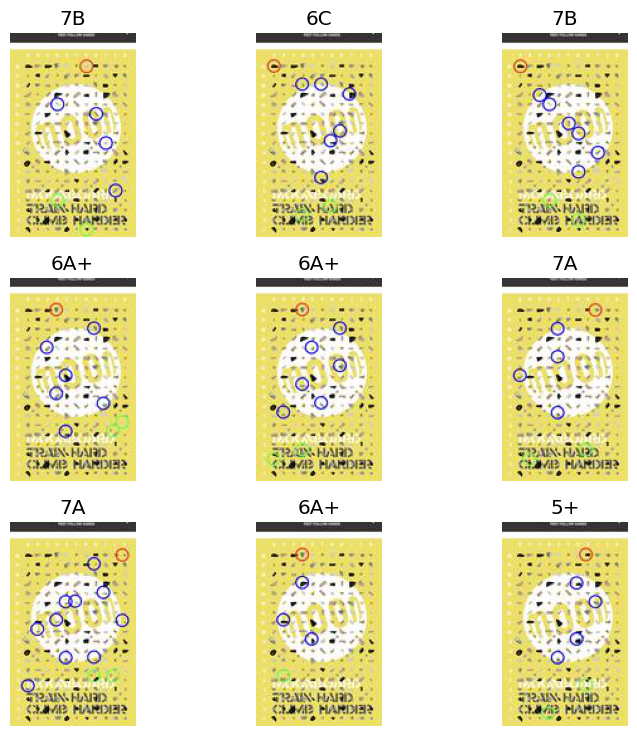

In [ ]:
dls.show_batch()


In [ ]:
#!pip install fastbook
#!pip install fastai
from fastbook import *
from fastai.vision.widgets import *
import gradio as gr


path = Path()
model_file_name = 'export.pkl' # in order to upload i needed to setup git lfs
#learn_inf = load_learner(path/model_file_name)
learn_inf = learn

#categories = ('Black', 'Grizzly', 'Teddy')
categories = learn.dls.vocab

def classify_image(img):
    pred, indx, probs =  learn_inf.predict(img)
    return dict(zip(categories, map(float, probs)))


image = gr.inputs.Image(shape=(163, 100))
label = gr.outputs.Label()
examples = ['1150__6A.jpg', 'ALBATROS__7B.jpg', 'CHALK DUSTS__5+.jpg', 'HAGAY_IS_WEIRD__8B+.jpg']


iface = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
# iface.launch(inline=False)
iface.launch(share=True)

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://a3549fb37546321155.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


In [ ]:
logger = [[[[0, 0, 0] for i in range(5)] for j in range(5)] for k in range(3)]
logger

[[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]],
 [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]],
 [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]]]

In [ ]:
logger[3-1][5-1][5-1] = [1, 2, 3]

In [ ]:
logger

[[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]],
 [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]],
 [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [1, 2, 3]]]]

In [ ]:
[[[[3.2081260681152344, 3.7355620861053467, 0.06410256773233414], [1.4872236251831055, 2.383885383605957, 0.24358974397182465], [0.25458353757858276, 2.9526777267456055, 0.25641027092933655], [0.030998636037111282, 4.313003063201904, 0.3333333432674408], [0.0010290720965713263, 5.66404914855957, 0.24358974397182465]], [[3.255852222442627, 2.810370445251465, 0.19230769574642181], [1.4463638067245483, 2.6449787616729736, 0.25641027092933655], [0.28720518946647644, 3.3146989345550537, 0.29487180709838867], [0.05597914010286331, 3.777463912963867, 0.3461538553237915], [0.0013406422222033143, 4.667603492736816, 0.29487180709838867]], [[2.3345015048980713, 2.809504508972168, 0.1794871836900711], [0.7487644553184509, 2.9881439208984375, 0.3076923191547394], [0.18753914535045624, 4.155150890350342, 0.25641027092933655], [0.05493202805519104, 4.843024253845215, 0.3076923191547394], [0.0018211763817816973, 5.684046268463135, 0.28205129504203796]], [[2.610844135284424, 3.1434876918792725, 0.14102564752101898], [1.1457716226577759, 3.1360795497894287, 0.25641027092933655], [0.26451244950294495, 4.014006614685059, 0.3205128312110901], [0.07008223235607147, 4.3737945556640625, 0.3461538553237915], [0.002210518578067422, 6.280470371246338, 0.23076923191547394]], [[2.473921060562134, 3.9003868103027344, 0.03846153989434242], [1.3017905950546265, 3.3132805824279785, 0.26923078298568726], [0.2907029390335083, 4.360326290130615, 0.3205128312110901], [0.07383705675601959, 4.800082683563232, 0.3461538553237915], [0.0014469700399786234, 5.6124491691589355, 0.28205129504203796]]], [[[2.9315531253814697, 4.71618127822876, 0.05128205195069313], [1.2972822189331055, 2.4634883403778076, 0.28205129504203796], [0.30792519450187683, 2.8966221809387207, 0.3205128312110901], [0.043720535933971405, 3.8691303730010986, 0.3076923191547394], [0.0014574674423784018, 4.990474224090576, 0.3205128312110901]], [[2.925619125366211, 3.348576545715332, 0.10256410390138626], [1.4958900213241577, 2.7627294063568115, 0.26923078298568726], [0.33210518956184387, 3.0897200107574463, 0.3076923191547394], [0.05160577595233917, 4.304506301879883, 0.3076923191547394], [0.0011484742863103747, 5.733036041259766, 0.3205128312110901]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]], [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]]]


[[[[3.2081260681152344, 3.7355620861053467, 0.06410256773233414],
   [1.4872236251831055, 2.383885383605957, 0.24358974397182465],
   [0.25458353757858276, 2.9526777267456055, 0.25641027092933655],
   [0.030998636037111282, 4.313003063201904, 0.3333333432674408],
   [0.0010290720965713263, 5.66404914855957, 0.24358974397182465]],
  [[3.255852222442627, 2.810370445251465, 0.19230769574642181],
   [1.4463638067245483, 2.6449787616729736, 0.25641027092933655],
   [0.28720518946647644, 3.3146989345550537, 0.29487180709838867],
   [0.05597914010286331, 3.777463912963867, 0.3461538553237915],
   [0.0013406422222033143, 4.667603492736816, 0.29487180709838867]],
  [[2.3345015048980713, 2.809504508972168, 0.1794871836900711],
   [0.7487644553184509, 2.9881439208984375, 0.3076923191547394],
   [0.18753914535045624, 4.155150890350342, 0.25641027092933655],
   [0.05493202805519104, 4.843024253845215, 0.3076923191547394],
   [0.0018211763817816973, 5.684046268463135, 0.28205129504203796]],
  [[2.61

In [4]:
# Only for the subset of model runs I didn't get to with the 75 runs.

### For Loop to Iterate the Model Parameters to see what seems best
## Goal Output: Three adjacent grids - each representing the three picture resolutions (x100, x300, x1000). 
#    Rows = Number of epochs (1, 3, 10, 30). 
#    Cols = Pretrained models (resent18, 34, 50, 101, 152)
#    Values = Max accuracy
# Let's also keep all of the training data

# Import fast.ai package
from fastai.vision.all import *

# Define the paths to sets of pictures to try
pic_folder_paths = ["/content/gdrive/MyDrive/Colab Notebooks/Fast.ai/DL1/Lect2/Moonboard/processed_300"]

# Define the models to try
models_list = [models.resnet50, models.resnet101, models.resnet152]

# Define the number of epochs to try
num_epochs = [1, 3, 10, 30, 100]

# Create a variable to hold the output information
logger = [[[[0, 0, 0] for i in range(len(num_epochs))] 
           for j in range(len(models_list))] 
           for k in range(len(pic_folder_paths))]

# Define a function to extract the label from the filename
def label_func(fname):
    grade = str(fname).split("__")[-1].split(".")[0]
    return grade

# Define counters for the three loops
p_c = -1

# Iterate over all pictures
for p in pic_folder_paths:
  
  # Add to the p counter
  p_c += 1

  # Define the path to the folder containing the images
  path = Path(p)

  # Get a list of all image files in the folder
  files = get_image_files(path)

  # Create a DataLoaders object
  dls = ImageDataLoaders.from_name_func(path, files, valid_pct=0.2, seed=42, 
                                   label_func=label_func)

  # Define counters for the three loops
  m_c = -1
  
  # Iterate over all models
  for m in models_list:

    # Add to the p counter
    m_c += 1
  
    # Define the model
    learn = vision_learner(dls, m, metrics=accuracy)

    # Define counters for the three loops
    n_c = -1
  
    # Iterate over all epoch values to try
    for n in num_epochs:

      # Add to the p counter
      n_c += 1
    
      # Fine Tune the Model
      learn.fine_tune(n)

      # Log the data resulting from the runs
      logger[p_c][m_c][n_c] = [learn.final_record[0], 
                               learn.final_record[1], 
                               learn.final_record[2]]
      
      # TEMPORARY: Print the logger
      print(logger)




/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time


OutOfMemoryError: ignored

In [10]:
!pip install numba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from numba import cuda
device = cuda.get_current_device() 
device.reset()

In [3]:
!nvidia-smi

Wed May  3 01:08:52 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    27W /  70W |   3373MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!kill 0

In [1]:
[[[[3.2487215995788574, 2.7648138999938965, 0.1794871836900711], [2.8541083335876465, 2.7428267002105713, 0.19230769574642181], [2.422060489654541, 2.368724822998047, 0.21794871985912323], [2.2566487789154053, 2.2822256088256836, 0.23076923191547394], [2.2188515663146973, 2.3567488193511963, 0.21794871985912323]], [[3.2125439643859863, 3.1116816997528076, 0.14102564752101898], [2.9019317626953125, 2.731682538986206, 0.21794871985912323], [2.5938165187835693, 2.557586193084717, 0.24358974397182465], [2.241457223892212, 2.7780075073242188, 0.21794871985912323], [2.2057254314422607, 2.448244333267212, 0.21794871985912323]], [[3.2000935077667236, 3.1308910846710205, 0.1666666716337204], [2.6877646446228027, 2.4400501251220703, 0.26923078298568726], [2.4444360733032227, 2.486525297164917, 0.23076923191547394], [2.350350856781006, 2.414632797241211, 0.21794871985912323], [2.1536781787872314, 2.598797082901001, 0.20512820780277252]], [[3.671245574951172, 3.4808506965637207, 0.11538461595773697], [2.9292306900024414, 2.4633541107177734, 0.25641027092933655], [2.67279052734375, 2.568317413330078, 0.21794871985912323], [2.332852363586426, 2.354414463043213, 0.21794871985912323], [2.2350878715515137, 2.41803240776062, 0.19230769574642181]], [[3.2299089431762695, 2.7980613708496094, 0.1666666716337204], [2.826573371887207, 2.602203369140625, 0.21794871985912323], [2.7281010150909424, 2.6603429317474365, 0.21794871985912323], [0, 0, 0], [0, 0, 0]]], [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]], [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]]]


[[[[3.2487215995788574, 2.7648138999938965, 0.1794871836900711],
   [2.8541083335876465, 2.7428267002105713, 0.19230769574642181],
   [2.422060489654541, 2.368724822998047, 0.21794871985912323],
   [2.2566487789154053, 2.2822256088256836, 0.23076923191547394],
   [2.2188515663146973, 2.3567488193511963, 0.21794871985912323]],
  [[3.2125439643859863, 3.1116816997528076, 0.14102564752101898],
   [2.9019317626953125, 2.731682538986206, 0.21794871985912323],
   [2.5938165187835693, 2.557586193084717, 0.24358974397182465],
   [2.241457223892212, 2.7780075073242188, 0.21794871985912323],
   [2.2057254314422607, 2.448244333267212, 0.21794871985912323]],
  [[3.2000935077667236, 3.1308910846710205, 0.1666666716337204],
   [2.6877646446228027, 2.4400501251220703, 0.26923078298568726],
   [2.4444360733032227, 2.486525297164917, 0.23076923191547394],
   [2.350350856781006, 2.414632797241211, 0.21794871985912323],
   [2.1536781787872314, 2.598797082901001, 0.20512820780277252]],
  [[3.6712455749511

In [1]:
[[[[2.966918706893921, 2.4968745708465576, 0.23076923191547394], [2.662684440612793, 2.1681416034698486, 0.29487180709838867], [2.282472610473633, 1.8998812437057495, 0.3205128312110901], [2.266170024871826, 2.2824997901916504, 0.25641027092933655], [2.136624574661255, 2.114166021347046, 0.3205128312110901]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]]]

[[[[2.966918706893921, 2.4968745708465576, 0.23076923191547394],
   [2.662684440612793, 2.1681416034698486, 0.29487180709838867],
   [2.282472610473633, 1.8998812437057495, 0.3205128312110901],
   [2.266170024871826, 2.2824997901916504, 0.25641027092933655],
   [2.136624574661255, 2.114166021347046, 0.3205128312110901]],
  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]]]

In [ ]:
#### Regression model training

# Import the fast.ai library to handle data, training, and inference structures
from fastai.vision.all import *

# Define the path to the folder containing the images
path = Path("/content/gdrive/MyDrive/Colab Notebooks/Fast.ai/DL1/Lect2/Moonboard/processed_100")

# Define a function to map the grade (e.g. 6A+) to a number (e.g. 6.17)
def get_grade_number(fname):
    grade_str = label_func(fname)
    grade_map = {
        '5+': 5.83,
        '6A': 6.0,
        '6A+': 6.17,
        '6B': 6.33,
        '6B+': 6.5,
        '6C': 6.67,
        '6C+': 6.83,
        '7A': 7.0,
        '7A+': 7.17,
        '7B': 7.33,
        '7B+': 7.5,
        '7C': 7.67,
        '7C+': 7.83,
        '8A': 8.0,
        '8A+': 8.17,
        '8B': 8.33,
        '8B+': 8.5,
        '8C': 8.67,
        '8C+': 8.83,
    }
    return grade_map.get(grade_str)

# Define a function to extract the label from the filename
def label_func(fname):
    grade = str(fname).split("__")[-1].split(".")[0]
    return grade

# Get a list of all image files in the folder
files = get_image_files(path)

# Create a DataLoaders object
dls = ImageDataLoaders.from_name_func(path, files, valid_pct=0.2, seed=42, 
                                      bs=2, label_func=get_grade_number)

# Define the regression loss function
loss_func = nn.L1Loss()

# learn = vision_learner(dls, models.resnet34, metrics=accuracy)
learn = cnn_learner(dls, models.resnet34, loss_func=loss_func, 
                    metrics=mae)
learn.fine_tune(1)
learn.path = Path('.')
learn.export()

In [4]:
# 1000, resnet18
[[[[2.9394240379333496, 4.757616996765137, 0.1666666716337204], [2.680938959121704, 4.0937819480896, 0.1538461595773697], [2.4048349857330322, 2.041473865509033, 0.3333333432674408], [2.252042531967163, 2.134768486022949, 0.3076923191547394], [2.097468376159668, 2.1181724071502686, 0.29487180709838867]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]], [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]]]

[[[[2.9394240379333496, 4.757616996765137, 0.1666666716337204],
   [2.680938959121704, 4.0937819480896, 0.1538461595773697],
   [2.4048349857330322, 2.041473865509033, 0.3333333432674408],
   [2.252042531967163, 2.134768486022949, 0.3076923191547394],
   [2.097468376159668, 2.1181724071502686, 0.29487180709838867]],
  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]],
 [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
  [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]]]